In [1]:
from os import listdir  # libraria os pentru a incarca fisierele
from os.path import isdir, join

import numpy as np  # pentru a lucra cu matrici si tensori
from tensorflow.keras import layers  # pentru a construi reteaua neuronala
from tensorflow.keras import models

In [2]:
# Creez o lista a cuvintelor disponibile si elimin setul de zgomote, imi incurca testarea
dataset_path = 'C:/Users//radu2/OneDrive/Desktop/CorpusDeNumere/MTA_numere_gruptate'
all_targets = [name for name in listdir(dataset_path) if isdir(join(dataset_path, name))]
#all_targets.remove('_background_noise_')
print(all_targets)

['apeleaza', 'cinci', 'diez', 'doi', 'elimina', 'formeaza', 'noua', 'opt', 'patru', 'sapte', 'sase', 'steluta', 'sterge', 'trei', 'unu', 'urgenta', 'zero']


In [65]:
# Imi setez calea catre fisierul de caracteristici MFCC
feature_sets_path = 'E:\\CorpusDeNumere\\Work\\Cod\\var1'
feature_sets_filename = 'all_targets_mfcc_sets.npz'
model_filename = 'wake_word_apeleaza_model.h5' #salvez modelul de retea neuronala in acest fisier
wake_word = 'apeleaza' #Cuvant de wake-up

In [66]:
# Load feature sets
feature_sets = np.load(join(feature_sets_path, feature_sets_filename)) #folosesc numpy sa incarc setul de caracteristici si verific seturile disponibile
print(feature_sets.files)

['x_train', 'y_train', 'x_val', 'y_val', 'x_test', 'y_test']


In [67]:
# Imi creez variabile pentru fiecare set de caracteristici
x_train = feature_sets['x_train']
y_train = feature_sets['y_train']
x_val = feature_sets['x_val']
y_val = feature_sets['y_val']
x_test = feature_sets['x_test']
y_test = feature_sets['y_test']

In [68]:
# Vizualizez dimensiunile tensorilor
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)
#prima valoare - numarul de monstre
#a doua - numarul de coeficienti
#a treia - numarul de seturi de coeficienti din fiecare monstra



(601, 16, 16)
(601, 16, 16)
(601, 16, 16)


In [69]:

print(y_val) #lista de indexi

[ 0. 15.  8. 15.  6. 11. 11.  7.  0.  7. 15. 15. 10. 11. 15.  5. 12.  4.
 11. 12. 11.  5. 11.  9. 12. 11.  6.  9. 15.  7. 12.  4. 10. 11. 16. 15.
  0. 11.  1. 11.  4.  0. 12.  4.  6.  7.  4. 10.  4.  6.  0. 16.  1.  4.
  3. 12.  2.  5. 11. 12. 12. 10.  1. 12.  4. 10.  5.  0.  5. 15.  2.  4.
  2. 16.  8. 12.  3.  9. 11.  6.  8. 14. 12.  4. 12.  5. 15.  5. 15.  6.
  2.  4.  8. 11. 11. 11.  4. 12.  4.  5. 10.  5. 12.  9.  5.  2.  7.  2.
 12.  0. 12.  2.  7. 12. 16.  4.  0. 16.  6.  5.  4.  9.  2. 12. 12. 15.
 12. 16. 12.  2. 11.  1. 11. 11. 12.  5.  7. 16.  2. 15. 11.  9.  2.  4.
 11.  1. 15.  1.  4. 11. 11.  2. 15.  1.  1.  2.  0. 12. 14.  2.  1.  0.
  2.  5.  1.  5.  9.  2. 11.  1. 15. 15. 12.  2.  4. 11. 12.  5.  6.  8.
  0. 15. 12. 12.  0.  0. 11. 11.  8.  2. 11.  5. 12. 15.  0.  0.  0.  8.
  8.  3. 11.  0. 11.  5.  9.  2.  9.  2.  5.  7. 15. 12. 12.  4.  0. 11.
 16. 12.  5. 15.  6.  5.  4. 15.  7.  2.  6. 15.  9.  9.  7.  6.  6.  0.
  5.  7.  0. 15.  5. 12.  5.  7.  2.  4. 10.  5.  5

In [70]:
# Etichetez cele trei seturi cu valori de 0 si 1. Zero - nu este wake_word.
wake_word_index = all_targets.index(wake_word)#  
y_train = np.equal(y_train, wake_word_index).astype('float64') #cum np.equals intoarce True/False, folosesc astype('float64') sa intorc 1/0
y_val = np.equal(y_val, wake_word_index).astype('float64')
y_test = np.equal(y_test, wake_word_index).astype('float64')

In [71]:
# Afisez etichetele dupa conversie
print(y_val)
print(y_train)
print(y_test)

[1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0.

In [72]:
# Cu ce procent apare cuvantul "stop" printre etichete.
print(sum(y_val) / len(y_val)) #procentul de "1"(wake_word) din setul de validare
print(1 - sum(y_val) / len(y_val))

0.09983361064891846
0.9001663893510815


In [73]:
# Vad dimensiunile datelor de intrare
print(x_train.shape)

(601, 16, 16)


In [74]:
# Reteaua Neuronala Convolutionala asteapta pentru TensorFlow input de forma (batch, height, width, channels)
# Asa ca vom remodela tensorii de input cu un canal de culoare "1"
x_train = x_train.reshape(x_train.shape[0], 
                          x_train.shape[1], 
                          x_train.shape[2], 
                          1)
x_val = x_val.reshape(x_val.shape[0], 
                      x_val.shape[1], 
                      x_val.shape[2], 
                      1)
x_test = x_test.reshape(x_test.shape[0], 
                        x_test.shape[1], 
                        x_test.shape[2], 
                        1)
        #red,green,yellow - cele 3 canale
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(601, 16, 16, 1)
(601, 16, 16, 1)
(601, 16, 16, 1)


In [75]:
# Input shape for CNN is size of MFCC of 1 sample
sample_shape = x_test.shape[1:]
print(sample_shape)

(16, 16, 1)


In [76]:
# Build model
# Based on: https://www.geeksforgeeks.org/python-image-classification-using-keras/
model = models.Sequential()
model.add(layers.Conv2D(32, 
                        (2, 2), 
                        activation='relu',
                        input_shape=sample_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(32, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (2, 2), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

# Classifier
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [77]:
# Display model
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 15, 15, 32)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 6, 6, 32)          4128      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 2, 2, 64)          8256      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

#Totalul acestor parametri ne spune cate operatii matematice vom efectua, vrem sa fie cat mai mic.

In [78]:
# Adaug parametri de antrenare modelului
model.compile(loss='binary_crossentropy', #loss function - calculeaza cat de departe este predictia de actuala valoare
              optimizer='rmsprop', #SGD/RMSProp/Adam.(functie de optimizare) Pentru nodul final vrem sa folosim entropie incrucisata binara 
              metrics=['acc']) #voi inregistra acuratetea

In [79]:
# Antrenez modelul
history = model.fit(x_train,  #prin functia fit, antrenez. Parametrii vor fi monstrele de antrenare ascociate cu vectorul de antrenare y_train.
                    y_train, 
                    epochs=30, #prin cate epoci vreau sa trec
                    batch_size=100, #dimensiunea lotului #de marit
                    validation_data=(x_val, y_val)) #Oferim si monstrele de validare.
                    #Cu numarul de epoci si batch_size ma joc sa obtin o acuratete cat mai buna 

Epoch 1/30
7/7 [==============================] - 1s 42ms/step - loss: 0.4672 - acc: 0.7770 - val_loss: 0.2852 - val_acc: 0.9002
Epoch 2/30
7/7 [==============================] - 0s 23ms/step - loss: 0.2709 - acc: 0.9002 - val_loss: 0.4741 - val_acc: 0.7072
Epoch 3/30
7/7 [==============================] - 0s 23ms/step - loss: 0.2869 - acc: 0.8752 - val_loss: 0.2669 - val_acc: 0.9002
Epoch 4/30
7/7 [==============================] - 0s 21ms/step - loss: 0.2523 - acc: 0.9018 - val_loss: 0.2381 - val_acc: 0.9002
Epoch 5/30
7/7 [==============================] - 0s 18ms/step - loss: 0.2349 - acc: 0.9052 - val_loss: 0.4353 - val_acc: 0.7454
Epoch 6/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2648 - acc: 0.8968 - val_loss: 0.2521 - val_acc: 0.9002
Epoch 7/30
7/7 [==============================] - 0s 16ms/step - loss: 0.2325 - acc: 0.9035 - val_loss: 0.2539 - val_acc: 0.9002
Epoch 8/30
7/7 [==============================] - 0s 15ms/step - loss: 0.2233 - acc: 0.9035 - val

#acc - scorul acuratatetii ce imi spune cum performeaza modelul pe datele de testare 
#val-acc - scor de acuratete al validarii ce ne spune cum performeaza modelul pe date de validare incrucisate 

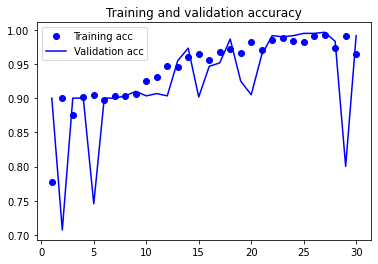

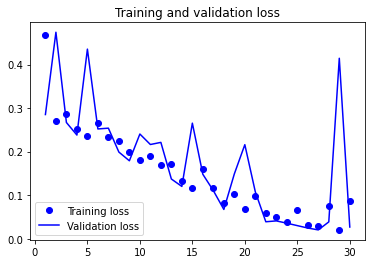

In [80]:
# Plot results - acuratetea si pierderile
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc') #acuratetea de testare (puncte)
plt.plot(epochs, val_acc, 'b', label='Validation acc') #setul de validare - validare incrucisata (linie)
plt.title('Training and validation accuracy')  #Atentie la overfitting. Daca modelul se potriveste exact cu setul de testare, voi avea probleme cand voi testa pe date nestiute.
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [81]:
# Salvez modelul ca un fisier.
models.save_model(model, model_filename)

In [82]:
# Printez toti indicii ce pointeza spre cuvantul stop din setul de testare.
for idx, y in enumerate(y_test):
    if y == 1:
        print(idx) #

0
8
36
41
50
67
109
116
156
161
180
184
185
194
195
196
201
214
233
236
254
260
267
287
291
297
298
306
317
321
324
325
327
330
340
348
370
382
383
389
413
427
428
435
441
442
450
461
467
469
486
501
510
517
525
527
540
541
569
585


In [85]:
# TEST: Load model and run it against test set
model = models.load_model(model_filename)
for i in range(10, 600):
    print('Answer:', y_test[i], ' Prediction:', model.predict(np.expand_dims(x_test[i], 0)))

Answer: 0.0  Prediction: [[0.00222069]]
Answer: 0.0  Prediction: [[0.0012306]]
Answer: 0.0  Prediction: [[0.000867]]
Answer: 0.0  Prediction: [[0.00081395]]
Answer: 0.0  Prediction: [[0.00010368]]
Answer: 0.0  Prediction: [[0.01241155]]
Answer: 0.0  Prediction: [[0.00010164]]
Answer: 0.0  Prediction: [[0.00032653]]
Answer: 0.0  Prediction: [[0.0002221]]
Answer: 0.0  Prediction: [[1.1114038e-05]]
Answer: 0.0  Prediction: [[6.071153e-05]]
Answer: 0.0  Prediction: [[0.07817439]]
Answer: 0.0  Prediction: [[0.00481052]]
Answer: 0.0  Prediction: [[0.00047703]]
Answer: 0.0  Prediction: [[0.0014216]]
Answer: 0.0  Prediction: [[0.00035755]]
Answer: 0.0  Prediction: [[5.5994497e-05]]
Answer: 0.0  Prediction: [[0.00081265]]
Answer: 0.0  Prediction: [[0.00018435]]
Answer: 0.0  Prediction: [[4.5891957e-05]]
Answer: 0.0  Prediction: [[0.00237337]]
Answer: 0.0  Prediction: [[6.2437457e-06]]
Answer: 0.0  Prediction: [[0.00252781]]
Answer: 0.0  Prediction: [[2.6383872e-05]]
Answer: 0.0  Prediction: [[4

KeyboardInterrupt: 

In [86]:
# Evaluate model with test set
model.evaluate(x=x_test, y=y_test)

19/19 [==============================] - 0s 3ms/step - loss: 0.0269 - acc: 0.9917


[0.026934688910841942, 0.9916805028915405]